# Support Vector Machine (classification) for ChatBot Development

In [3]:
import pandas as pd
import numpy as np
# import pickle
# import operator
from sklearn.svm import SVC # SVC for classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import _stop_words

import random
import nltk
nltk.download('punkt')   # Sentence Tokenizer

from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

import string
print(string.punctuation)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## NLTK Library



**Punkt** Sentence Tokenizer

This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

The NLTK data package includes a pre-trained Punkt tokenizer for English.

**Stemming** is the process of removing a part of a word, or reducing a word to its stem or root. 

Let’s assume we have a set of words — send, sent and sending. All three words are different tenses of the same root word send. So after we stem the words, we’ll have just the one word — send.

*2 types of stemming in NLTK*

- **Porter Stemming** 
    - Porter stemming algorithm was developed by Martin Porter in 1980 and is one of the most widely used stemming algorithms.
    - It uses a set of rules and heuristics to remove common suffixes from words to obtain their root form.
    - Porter stemming algorithm applies a sequence of steps to gradually reduce words to their base form.
    - It tends to be more conservative and produces slightly longer stems compared to Lancaster stemming.
    - Porter stemming is computationally efficient and relatively easy to understand and implement.

- **Lancaster stemming** 
    - Lancaster stemming algorithm, also known as the Lancaster stemming algorithm or Paice/Husk stemming algorithm, was developed by Chris Paice and Gerald Husk in 1990.
    - It is a more aggressive stemming algorithm compared to Porter stemming.
    - Lancaster stemming applies a series of rules to remove suffixes from words, but the rules used are more aggressive and may result in more aggressive stemming.
    - It is known for producing shorter stems compared to Porter stemming.
    - Lancaster stemming is computationally more intensive and may sometimes result in over-stemming, where words are stemmed too aggressively, potentially leading to the loss of some meaningful information.

In [4]:
# Example

l_words1 = ['cats', 'trouble', 'troubling', 'troubled', 'car', 'cars', 'send', 'sent', 'sending']
l_words2 = ['dogs', 'programming', 'programs', 'programmed', 'cakes', 'indices', 'matrices']

sentence1 = "A stemmer for English operating on the stem cat should identify such strings as cats, catlike, and catty." 
sentence2 = "A stemming algorithm might also reduce the words fishing, fished, and fisher to the stem fish."
sentence3 = "The stem need not be a word, for example the Porter algorithm reduces, argue, argued, argues, arguing, and argus to the stem argu."
whole_sentence = sentence1 + " " + sentence2 + " " + sentence3

In [5]:
# Porter stemming 
stemmer = PorterStemmer()    # declare stemmer

print("Stemming the words")

for word in l_words1:
    print(f'{word} \t -> {stemmer.stem(word)}'.expandtabs(15))     #expandtabs is to put space in print

print("\n")
for word in l_words2:
    print(f'{word} \t -> {stemmer.stem(word)}'.expandtabs(15))

print("############################# ")
#####################################################################
print("Stemming a sentence\n")

print("Sentence:")
print(whole_sentence)
print("\n")

tokenized_words = nltk.word_tokenize(whole_sentence)   #tokenize the words from sentence
print("Tokenized words:")
print(tokenized_words)
print("\n")

tokenized_sentence = []
for word in tokenized_words:
    tokenized_sentence.append(stemmer.stem(word))

print("After Stemming:")
print("Tokenized sentences:")
print(tokenized_sentence)
print("\n")

print("After Joining with stemmed sentences with space:")
tokenized_sentence = " ".join(tokenized_sentence)
print("Tokenized sentences:")
print(tokenized_sentence)

Stemming the words
cats            -> cat
trouble         -> troubl
troubling       -> troubl
troubled        -> troubl
car             -> car
cars            -> car
send            -> send
sent            -> sent
sending         -> send


dogs            -> dog
programming     -> program
programs        -> program
programmed      -> program
cakes           -> cake
indices         -> indic
matrices        -> matric
############################# 
Stemming a sentence

Sentence:
A stemmer for English operating on the stem cat should identify such strings as cats, catlike, and catty. A stemming algorithm might also reduce the words fishing, fished, and fisher to the stem fish. The stem need not be a word, for example the Porter algorithm reduces, argue, argued, argues, arguing, and argus to the stem argu.


Tokenized words:
['A', 'stemmer', 'for', 'English', 'operating', 'on', 'the', 'stem', 'cat', 'should', 'identify', 'such', 'strings', 'as', 'cats', ',', 'catlike', ',', 'and', 'catty', 

In [6]:
# Lancaster stemming 
stemmer = LancasterStemmer()    # declare stemmer

print("Stemming the words")

for word in l_words1:
    print(f'{word} \t -> {stemmer.stem(word)}'.expandtabs(15))     #expandtabs is to put space in print

print("\n")
for word in l_words2:
    print(f'{word} \t -> {stemmer.stem(word)}'.expandtabs(15))

print("############################# ")
#####################################################################
print("Stemming a sentence\n")

print("Sentence:")
print(whole_sentence)
print("\n")

tokenized_words = nltk.word_tokenize(whole_sentence)   #tokenize the words from sentence
print("Tokenized words:")
print(tokenized_words)
print("\n")

tokenized_sentence = []
for word in tokenized_words:
    tokenized_sentence.append(stemmer.stem(word))

print("After Stemming:")
print("Tokenized sentences:")
print(tokenized_sentence)
print("\n")

print("After Joining with stemmed sentences with space:")
tokenized_sentence = " ".join(tokenized_sentence)
print("Tokenized sentences:")
print(tokenized_sentence)

Stemming the words
cats            -> cat
trouble         -> troubl
troubling       -> troubl
troubled        -> troubl
car             -> car
cars            -> car
send            -> send
sent            -> sent
sending         -> send


dogs            -> dog
programming     -> program
programs        -> program
programmed      -> program
cakes           -> cak
indices         -> ind
matrices        -> mat
############################# 
Stemming a sentence

Sentence:
A stemmer for English operating on the stem cat should identify such strings as cats, catlike, and catty. A stemming algorithm might also reduce the words fishing, fished, and fisher to the stem fish. The stem need not be a word, for example the Porter algorithm reduces, argue, argued, argues, arguing, and argus to the stem argu.


Tokenized words:
['A', 'stemmer', 'for', 'English', 'operating', 'on', 'the', 'stem', 'cat', 'should', 'identify', 'such', 'strings', 'as', 'cats', ',', 'catlike', ',', 'and', 'catty', '.', '

## Data Loading and Data Exploration

In [7]:
input_data = pd.read_csv('BankFAQs.csv')
input_data.head()
# input_data[1000:-1]

,Question,Answer,Class
0,Do I need to enter ‘#’ after keying in my Card...,Please listen to the recorded message and foll...,security
1,What details are required when I want to perfo...,"To perform a secure IVR transaction, you will ...",security
2,How should I get the IVR Password if I hold a...,An IVR password can be requested only from the...,security
3,How do I register my Mobile number for IVR Pas...,Please call our Customer Service Centre and en...,security
4,How can I obtain an IVR Password,By Sending SMS request: Send an SMS 'PWD<space...,security


In [8]:
print("Number of samples:", len(input_data))

Number of samples: 1764


In [9]:
questions = input_data['Question'].values
answers = input_data['Answer'].values

print("Question:")
print(questions[0])
print("Answer:")
print(answers[0])

Question:
Do I need to enter ‘#’ after keying in my Card number/ Card expiry date/ CVV number
Answer:
Please listen to the recorded message and follow the instructions while entering your card details.


In [10]:
print("Number of samples in each label")
print(input_data['Class'].value_counts())

Number of samples in each label
insurance        469
cards            403
loans            375
accounts         306
investments      140
security          57
fundstransfer     14
Name: Class, dtype: int64


## Data Processing and Preparation

In [11]:
stemmer = PorterStemmer()  

def cleanup(sentence):
    word_tok = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(w) for w in word_tok]

    return ' '.join(stemmed_words)

**Cleaning punctuation**

In [12]:
# Example
sample = 'Hi!!! ^^$&^$%# $%!^( How are (*(*^ &@! you?'
clean_sentence = sample.translate(str.maketrans('', '', string.punctuation))  # 

print("Length of clean sentence:", len(clean_sentence)) #it counts every words including space
print(type(clean_sentence))
print(clean_sentence)
print(cleanup(clean_sentence))

Length of clean sentence: 18
<class 'str'>
Hi   How are   you
hi how are you


In [13]:
# with our real data

X = []
for question in questions:
  clean_sentence = question.translate(str.maketrans('', '', string.punctuation)) # Cleaning punctuation
  X.append(cleanup(clean_sentence))         #stemming

print("Original Question:")
print(questions[0])
print("\n")
print("After Stemming, Question:")
print(X[0])

Original Question:
Do I need to enter ‘#’ after keying in my Card number/ Card expiry date/ CVV number


After Stemming, Question:
do i need to enter ‘ ’ after key in my card number card expiri date cvv number


**Using stop words**

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

In **Natural Language Processing** and **text mining applications**, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

We do not always remove the stop words. The removal of stop words is highly dependent on the task we are performing and the goal we want to achieve. For example, if we are training a model that can perform the sentiment analysis task, we might not remove the stop words.

**Movie review:** “The movie was not good at all.”

**Text after removal of stop words:** “movie good”

We can clearly see that the review for the movie was negative. However, after the removal of stop words, the review became positive, which is not the reality. Thus, the removal of stop words can be problematic here.

In [14]:
print("Checking lists of stop words in English")
print(_stop_words.ENGLISH_STOP_WORDS)

Checking lists of stop words in English
frozenset({'side', 'either', 'why', 'no', 'amoungst', 'sixty', 'anywhere', 'your', 'please', 'hers', 'such', 'beside', 'my', 'where', 'full', 'anyway', 'while', 'whence', 'since', 'yourself', 'seeming', 'well', 'alone', 'even', 'had', 'hereupon', 'hundred', 'beyond', 'around', 'ie', 'at', 'on', 'anyone', 'are', 'five', 'inc', 'call', 'the', 'something', 'last', 'cant', 'than', 'within', 'becomes', 'by', 'mostly', 'seemed', 'although', 'or', 'afterwards', 'several', 'else', 'about', 'next', 'after', 'made', 'we', 'un', 'thick', 'to', 'whither', 'nor', 'three', 'his', 'detail', 'often', 'everything', 'still', 'must', 'any', 'further', 'indeed', 'elsewhere', 'if', 'meanwhile', 'might', 'without', 'bottom', 'however', 'empty', 'yet', 'some', 'you', 'for', 'front', 'along', 'nothing', 'thru', 'nevertheless', 'she', 'serious', 'former', 'also', 'throughout', 'ourselves', 'hence', 'none', 'one', 'these', 'amongst', 'herself', 'a', 'have', 'perhaps', 'ot

**TF-IDF** is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. 

In **TfidfVectorizer** we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.


In [15]:
# Example

corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

print("Without using stop word")
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
X_example = vectorizer.transform(corpus)
print(vectorizer.get_feature_names_out())
print(X_example.shape)
print("\n")

print("With stop word")
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(corpus)
X_example = vectorizer.transform(corpus)
print(vectorizer.get_feature_names_out())
print(X_example.shape)
print("\n")

Without using stop word
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
(4, 9)


With stop word
['document' 'second']
(4, 2)




In [16]:
# real data

vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(X)
X = vectorizer.transform(X)
# print(vectorizer.get_feature_names_out())
print(X.shape)

(1764, 954)


**LabelEncoder** encode labels with a value between 0 and (n_classes - 1) where n is the number of distinct labels. 

If a label repeats, it assigns the same value to as assigned earlier.

In [17]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(input_data['Class']) # sorted automatically

print(type(y))       # checking data type of y

print("Assigning the labels.")
print(sorted(input_data['Class'].unique()))
print(np.unique(y))

<class 'numpy.ndarray'>
Assigning the labels.
['accounts', 'cards', 'fundstransfer', 'insurance', 'investments', 'loans', 'security']
[0 1 2 3 4 5 6]


In [18]:
# We can check label assignments by indexing
labels_list = input_data['Class'].values
print(labels_list[-1])
print(y[-1])

cards
1


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2)
print(f"Shape of X train: {X_train.shape} \nShape of y train: {y_train.shape}")
print(f"Shape of X val: {X_val.shape} \nShape of y val:{y_val.shape}")

Shape of X train: (1411, 954) 
Shape of y train: (1411,)
Shape of X val: (353, 954) 
Shape of y val:(353,)


## Model Training and Evaluation

SVC kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

in sklearn lib, default kernel = ’rbf’


In [20]:
SVM_model = SVC(kernel='linear', max_iter= 1000)
SVM_model.fit(X_train, y_train)
print("Training Accuracy SVC:", SVM_model.score(X_train, y_train))
print("Validation Accuracy SVC:", SVM_model.score(X_val, y_val))

Training Accuracy SVC: 0.9900779588944011
Validation Accuracy SVC: 0.9206798866855525


# Model Testing

In [21]:
print("Question:")
# Question = input("Type your question:")
Question = "How do I get new card?"
print("Original Question:")
print(Question)
print("\n")

clean_sentence = Question.translate(str.maketrans('', '', string.punctuation)) # Cleaning punctuation
print("After cleaning punctuation:")
print(clean_sentence)
print("\n")

X_test = cleanup(clean_sentence)        #Stemming
print("After stemming:")
print(X_test)
print("\n")

X_test = vectorizer.transform([X_test])
print(X_test.shape)

pred = SVM_model.predict(X_test)
print("Prediction:", pred)

########### Getting label names for prediction ##################

#### Traditional way ###############
sorted_unique_labels = sorted(input_data['Class'].unique())
print("Unique Labels:", sorted_unique_labels)

customer_intention = None

for i in range(len(sorted_unique_labels)):
  if pred[0] == i:
    customer_intention = sorted_unique_labels[i]

print("Customer's intentions:", customer_intention)

#### Using label encoder  ###############
customer_intention = label_encoder.inverse_transform(pred)
print("Customer's intentions:", customer_intention[0])

Question:
Original Question:
How do I get new card?


After cleaning punctuation:
How do I get new card


After stemming:
how do i get new card


(1, 954)
Prediction: [1]
Unique Labels: ['accounts', 'cards', 'fundstransfer', 'insurance', 'investments', 'loans', 'security']
Customer's intentions: cards
Customer's intentions: cards


**Note**: Results will be biased to label 0 and 1 because these 2 labels have highest number of samples in dataset.

In [22]:
print(customer_intention) # from inverse transform
print(customer_intention[0])

['cards']
cards


In [23]:
# Find the questions in dataset that has same label to prediction
question_set = input_data[input_data['Class'] == customer_intention[0]]
print(question_set)

                                               Question  \
1361  What is the procedure to follow if my Debit Ca...   
1362  Why is 2nd Level authentication made mandatory...   
1363              Can I use my Debit Card to pay online   
1364   What should I do if my Debit Card is not working   
1365  How do I enable International Usage on my HDFC...   
...                                                 ...   
1759  What if I forget my Prepaid NetBanking login P...   
1760  What is the maximum value for which the Card c...   
1761  What options should I choose to withdraw cash ...   
1762  What should I do and whom to contact if my car...   
1763             Are there extra charges to be aware of   

                                                 Answer  Class  
1361  Please note that if you enter an incorrect PIN...  cards  
1362  All online card transactions, as per RBI’s man...  cards  
1363  Currently your Debit Card can be used to make ...  cards  
1364  If there is a technical p

**Cosine similarity**

In cosine similarity, data objects in a dataset are treated as a vector.

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

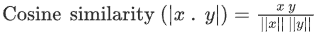

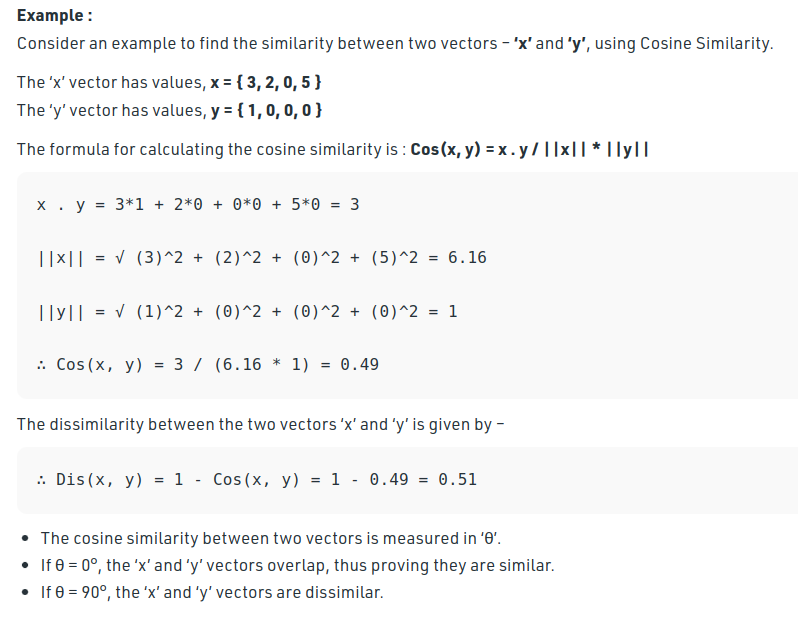

Advantages of cosine similarity:

- The cosine similarity is beneficial because even if the two similar data objects are far apart by the Euclidean distance because of the size, they could still have a smaller angle between them. Smaller the angle, higher the similarity.
- When plotted on a multi-dimensional space, the cosine similarity captures the orientation (the angle) of the data objects and not the magnitude.

In [24]:
cos_sims = []

for question in question_set['Question']:
  sims = cosine_similarity(vectorizer.transform([question]), X_test)
  cos_sims.append(sims)


print("Length of Question Set:", len(question_set))
print("Length of cosine similarity list:", len(cos_sims))
print("\n")

index = cos_sims.index(max(cos_sims))
print("Index of highest values in cosine similarity list:", index)

print("\n")
print("User: ", Question)
print("ChatBot: ", question_set['Answer'][question_set.index[index]])

Length of Question Set: 403
Length of cosine similarity list: 403


Index of highest values in cosine similarity list: 87


User:  How do I get new card?
ChatBot:  Yes, your accumulated Times point will be carried forward to the new card.


In [25]:
print(cos_sims)

[array([[0.11580829]]), array([[0.11045422]]), array([[0.16001767]]), array([[0.24922037]]), array([[0.18599295]]), array([[0.16538682]]), array([[0.24922037]]), array([[0.]]), array([[0.]]), array([[0.10609913]]), array([[0.]]), array([[0.12186963]]), array([[0.]]), array([[0.]]), array([[0.10285126]]), array([[0.09266757]]), array([[0.12448612]]), array([[0.11298327]]), array([[0.1210573]]), array([[0.12448612]]), array([[0.18220028]]), array([[0.14693525]]), array([[0.11227623]]), array([[0.11499542]]), array([[0.1319809]]), array([[0.15576747]]), array([[0.11799904]]), array([[0.09955987]]), array([[0.12116773]]), array([[0.133673]]), array([[0.1722445]]), array([[0.11499542]]), array([[0.15576747]]), array([[0.15576747]]), array([[0.11227623]]), array([[0.]]), array([[0.13581428]]), array([[0.17596796]]), array([[0.14071047]]), array([[0.24922037]]), array([[0.16146136]]), array([[0.14071047]]), array([[0.13581428]]), array([[0.24922037]]), array([[0.13581428]]), array([[0.1125310

In [26]:

# Firstly, make a list which includes both index and values

cos_sims_list = []
for index, values in enumerate(cos_sims):
    cos_sims_list.append((values, index))       # Put values in index 0 because we want to sort the values
cos_sims_list.sort(reverse=True)     # if reverse = True, it will sort starting with highest values

print(cos_sims_list[:5])
print("\n")

index_list = []
for i in cos_sims_list[:5]:             # Take indexs of first 5 values which are the 5 highest cosine similarity values
    index_list.append(i[1])             # i[1] means we are taking the index

print("Top 5 Indexs of highest values in cosine similarity list", index_list)

[(array([[0.54416511]]), 87), (array([[0.50570341]]), 120), (array([[0.49382755]]), 160), (array([[0.49206227]]), 135), (array([[0.47539991]]), 320)]


Top 5 Indexs of highest values in cosine similarity list [87, 120, 160, 135, 320]


In [27]:
print("\n")
print("User: ", Question)
print("\n")

print("Top 5 possible answers:")
for index in index_list:
  print("ChatBot: ", question_set['Answer'][question_set.index[index]])



User:  How do I get new card?


Top 5 possible answers:
ChatBot:  Yes, your accumulated Times point will be carried forward to the new card.
ChatBot:  Yes, We request you to get in touch with nearby branch along with original & copy of your passport to get the new passport number updated in the bank's records. Passport number is key validation criteria to check caller authenticity when you contact our 24 x 7 PhoneBanking service, hence it is recommended to update Passport number at the earliest.
ChatBot:  Yes, We request you to get in touch with nearby branch along with original & copy of your passport to get the new passport number updated in the bank's records. Passport number is key validation criteria to check caller authenticity when you contact our 24 x 7 PhoneBanking service, hence it is recommended to update Passport number at the earliest.
ChatBot:  Yes, We request you to get in touch with nearby branch along with original & copy of your passport to get the new passport numb